In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo = False)
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)

station_df = pd.read_sql("SELECT * FROM station", conn)

# reflect the tables

In [7]:
# We can view all of the classes that automap found
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [8]:
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [9]:
# Save references to each table


In [10]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

last12_months = pd.read_sql("SELECT * FROM measurement Order By date desc", conn)
last12_months.head()

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0


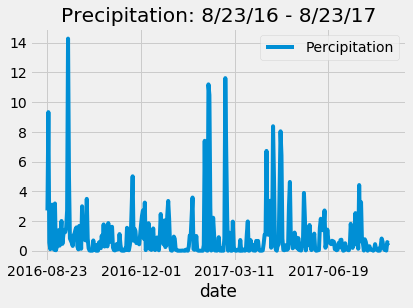

In [16]:
query = "SELECT date, sum(prcp) From measurement Where date >= '2016-08-23' Group by date Order by date asc"

last12_months = pd.read_sql(query, conn)

last12_months = last12_months.rename(columns={"sum(prcp)":"Percipitation"})
last12_months = last12_months.set_index('date')
last12_months.plot(title="Precipitation: 8/23/16 - 8/23/17")

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last12_months.describe()

,Percipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


In [19]:
# Design a query to show how many stations are available in this dataset?
query1 = "SELECT count(station) From station"
station_count = pd.read_sql(query1, conn)
station_count

,count(station)
0,9


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query2 = "SELECT station, count(station) From measurement Group by station Order by count(station)DESC"
stations_count = pd.read_sql(query2, conn)
stations_count

,station,count(station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
query3 = "SELECT station, Round(avg(tobs),2) From measurement group by station"
avg_temp = pd.read_sql(query3, conn)
avg_temp

,station,"Round(avg(tobs),2)"
0,USC00511918,71.62
1,USC00513117,72.69
2,USC00514830,74.87
3,USC00516128,70.92
4,USC00517948,74.68
5,USC00518838,72.72
6,USC00519281,71.66
7,USC00519397,74.55
8,USC00519523,74.54


In [22]:
query4= "SELECT station, max(tobs) From measurement group by station"
max_temp = pd.read_sql(query4, conn)
max_temp

,station,max(tobs)
0,USC00511918,87.0
1,USC00513117,85.0
2,USC00514830,85.0
3,USC00516128,84.0
4,USC00517948,87.0
5,USC00518838,83.0
6,USC00519281,85.0
7,USC00519397,87.0
8,USC00519523,85.0


In [23]:
query5 = "SELECT station, min(tobs) From measurement group by station"
min_temp = pd.read_sql(query5, conn)
min_temp

,station,min(tobs)
0,USC00511918,53.0
1,USC00513117,59.0
2,USC00514830,58.0
3,USC00516128,58.0
4,USC00517948,58.0
5,USC00518838,58.0
6,USC00519281,54.0
7,USC00519397,56.0
8,USC00519523,56.0


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query6 = "SELECT station, count(tobs) From measurement group by station order by count(tobs) desc"
temp_count = pd.read_sql(query6, conn)
temp_count

,station,count(tobs)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [31]:
query7 = "SELECT * From measurement where station = 'USC00519281' order by date desc"
temp_obsv = pd.read_sql(query7, conn)
temp_obsv.head()

,id,station,date,prcp,tobs
0,14959,USC00519281,2017-08-18,0.06,79.0
1,14958,USC00519281,2017-08-17,0.01,76.0
2,14957,USC00519281,2017-08-16,0.12,76.0
3,14956,USC00519281,2017-08-15,0.32,77.0
4,14955,USC00519281,2017-08-14,0.00,77.0


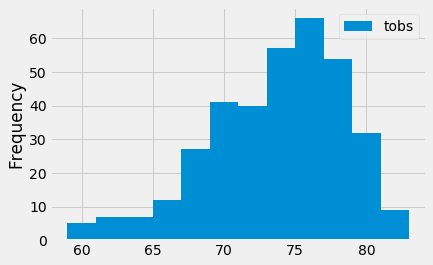

In [37]:
query8 = "SELECT date, tobs From measurement Where station = 'USC00519281' and date >= '2016-08-18' Group by date Order by date asc"

hist = pd.read_sql(query8, conn)
hist = hist.set_index('date')
hist.plot(kind='hist', bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
